## Coding Exercise #0704a

In [1]:
#Uncomment to force use of CPU.
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

#Suppress TF warnings
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

### 1. Softmax regression to recognize the handswritten digits:

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.1. Download the MNIST data:

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = tf.keras.datasets.mnist.load_data()

mnist_train_images = mnist_train_images.astype('float32') / 255
mnist_test_images = mnist_test_images.astype('float32') / 255

mnist_train_images = np.expand_dims(mnist_train_images, -1).reshape((mnist_train_images.shape[0],-1))
mnist_test_images = np.expand_dims(mnist_test_images, -1).reshape((mnist_test_images.shape[0],-1))

mnist_train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)          # one-hot encoding labels
mnist_test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

11490434/11490434 [==============================] - 0s 0us/step


#### 1.2. Take a look at the dataset:

In [4]:
print("Training data X shape: {}".format((mnist_train_images).shape))
print("Training data y shape: {}".format((mnist_train_labels).shape))
print("Training data cases: {}".format(mnist_train_images.shape[0]))
print("\n")
print("Testing data X shape: {}".format((mnist_test_images).shape))
print("Testing data y shape: {}".format((mnist_test_labels).shape))
print("Testing data cases: {}".format(mnist_test_images.shape[0]))

Training data X shape: (60000, 784)
Training data y shape: (60000, 10)
Training data cases: 60000


Testing data X shape: (10000, 784)
Testing data y shape: (10000, 10)
Testing data cases: 10000


Visualization.

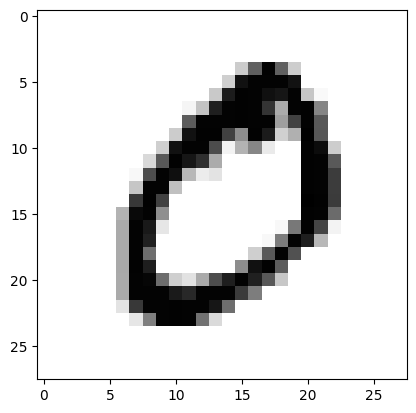

In [5]:
i_image= 1                                                      # Image index. You can change it at will.
a_single_image = mnist_train_images[i_image].reshape(28,28)     #  Reshape as a 2D array.
plt.imshow(1-a_single_image, cmap='gist_gray')                  #  Display as grayscale image.
plt.show()

In [6]:
# Check for the minimum and maximum pixel value.
# The data has been min-max-scaled already!
print("MIN : {}".format(a_single_image.min()))
print("MAX : {}".format(a_single_image.max()))

MIN : 0.0
MAX : 1.0


#### 1.3. Do the necessary definitions:

In [7]:
batch_size = 30                                # Size of each (mini) batch.
n_epochs  = 20000                              # Number of epochs.
learn_rate = 0.01

In [8]:
# Single layer.
# Thus, only one set of (b,W) required.
W = tf.Variable(tf.zeros([784,10]))              # Input nodes = 784. Output nodes = 10.
b = tf.Variable(tf.zeros([10]))                  # For each output, a bias is required.

In [10]:
# A single layer model.
# Not strictly necessary to apply the softmax activation. => in the end we will apply argmax() function to predict the label!
# y_model = tf.nn.softmax(tf.matmul(X, W) + b)
# The following will work just fine.
def model(X):
  return tf.matmul(X, W) + b

In [11]:
def loss_fn(y_true, y_pred):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))   # loss = Cross Entropy.

In [12]:
optimizer = tf.optimizers.Adam(learning_rate = learn_rate)         # A better optimizer.
# optimizer = tf.optimizers.SGD(learning_rate = learn_rate)        # A basic optimizer.

#### 1.4. Training and Testing:

In [13]:
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = loss_fn(y, y_pred)
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

# To replicate functionalities of tensorflow v1.* next_batch():
train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train_images, mnist_train_labels))  # join together images and labels
train_dataset = train_dataset.repeat().batch(batch_size)                                      # yield batches that straddle epoch boundaries
# train_dataset = train_dataset.batch(batch_size)                                             # if clear epoch separation is needed

# Training.
for i in range(n_epochs):
    batch_X, batch_y = next(iter(train_dataset))                                # Get a batch.
    train_step(batch_X, batch_y)
    if (i + 1) % 2000 == 0:
        print("Step : {}".format(i + 1))                                        # Print the step number at every multiple of 2000.

# Testing.
correct_predictions = tf.equal(tf.argmax(mnist_test_labels, axis=1), tf.argmax(model(mnist_test_images), axis=1))  # In argmax(), axis=1 means horizontal direction.
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))                            # Recast the Boolean as float32 first. Then calculate the mean.
accuracy_value = accuracy.numpy()

Step : 2000
Step : 4000
Step : 6000
Step : 8000
Step : 10000
Step : 12000
Step : 14000
Step : 16000
Step : 18000
Step : 20000


Print the testing result.

In [14]:
print("Accuracy = {:5.3f}".format(accuracy_value))

Accuracy = 0.527
